In [1]:
# pip install pystokes

## Example 1 : sedimentation of two particles


In [2]:
## import pystokes
import pystokes


## import numpy and matplotlib
import numpy as np, matplotlib.pyplot as plt

## Velocity of one sedimenting sphere

$$\mathbf{V} =\mu^T_0\,\mathbf{F}
$$

It is useful to note that

$$
\mu_0^T  =\frac{1}{6\pi\eta b}
$$

In [3]:
#Parameters
N=1
a, eta, dim = 1.0, 1.0/6, 3
ta =(4*np.pi/3)**(1.0/3) 
L = ta/np.asarray([0.1, 0.3, 0.4, 0.5, 0.6, 0.7])

# Memory allocation
v = np.zeros(dim*N)         
r = np.zeros(dim*N)        
F = np.zeros(dim*N)  
vv  = np.zeros(np.size(L))
phi = np.zeros(np.size(L) )

mu=1.0/(6*np.pi*eta*a)

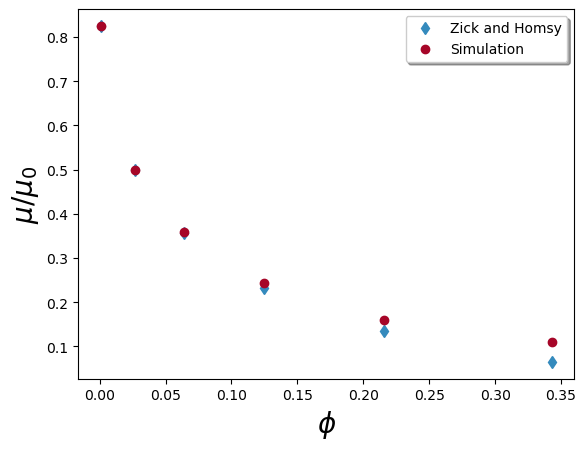

volume fraction   simulation	 Zick & Homsy (1982)
0.001		  0.825		 0.825	
0.027		  0.499		 0.498	
0.064		  0.360		 0.356	
0.125		  0.245		 0.233	
0.216		  0.159		 0.134	
0.343		  0.110		 0.065	


In [4]:
# Deafult value of xi = sqrt (pi/L)

Nb, Nm = 1, 4   
# 2Nb+1 periodic boxes and Nm modes


for i in range(np.size(L)):
    v = v*0
    F = F*0

    r[0], r[1], r[2] = 0.0, 0.0, 0.0

    ff = pystokes.forceFields.Forces(N)
    ff.sedimentation(F, g=-1)                          
    
    pRbm = pystokes.periodic.Rbm(a, N, eta, L[i])   
    pRbm.mobilityTT(v, r, F, Nb, Nm)                  
    
    phi[i] = (4*np.pi*a**3)/(3*L[i]**3)
    mu00 = mu*F[2]
    vv[i] = v[2]/mu00   
    

exR = [.825, .498, .356, .233, .134, .065]
plt.plot(phi, exR, 'd', color="#348ABD", label='Zick and Homsy')
plt.plot(phi, vv, 'o', color="#A60628", label='Simulation')

plt.xlabel(r'$\phi$', fontsize=20); plt.ylabel(r'$\mu/\mu_0$', fontsize=20)
plt.legend(loc='upper right', shadow=True); plt.show()

print ('volume fraction   simulation\t Zick & Homsy (1982)')
for i in range(np.size(L)):
    print ('%1.3f\t\t  %1.3f\t\t %1.3f\t'%(phi[i], vv[i], exR[i] ))